In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
classes = ['angry', 'happy', 'neutral', 'sad', 'surprise']

In [3]:
dataDirectory = r"Masked-fer2013\train"

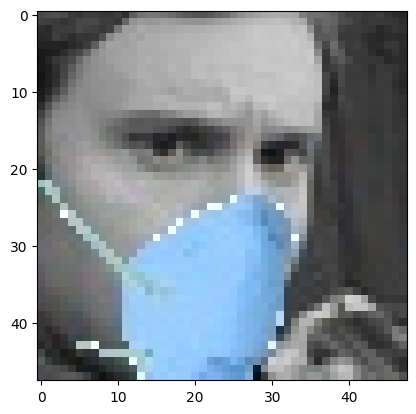

In [4]:
for category in classes:
    path = os.path.join(dataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) / 255.0)
        plt.show()
        break
    break

In [5]:
trainingData = []

def createTrainingData():
    for category in classes:
        path = os.path.join(dataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                normalize = img_array / 255.0
                trainingData.append([normalize, class_num])
            except Exception as e:
                pass

In [6]:
createTrainingData()

In [7]:
import random

random.shuffle(trainingData)

In [8]:
X_masked = []
y_masked = []

for features, label in trainingData:
    X_masked.append(features)
    y_masked.append(label)

X_masked = np.array(X_masked).reshape(-1, 48, 48, 3)

In [9]:
X_masked.shape

(17095, 48, 48, 3)

In [10]:
len(y_masked)

17095

In [43]:
from keras.applications.vgg19 import VGG19
model = VGG19(include_top=False, input_shape=(48, 48, 3))

In [44]:
from tensorflow.keras.utils import to_categorical

num_classes = 5
y_one_hot_masked = to_categorical(y_masked, num_classes)

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Add custom top
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=model.input, outputs=output)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_masked, y_one_hot_masked,
    validation_data = (X_masked_test, y_test_one_hot)
    epochs=5,  # You can change this
    batch_size=32
)

Epoch 1/5


ValueError: Unknown variable: <KerasVariable shape=(3, 3, 3, 64), dtype=float32, path=block1_conv1/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [21]:
loss, accuracy = model.evaluate(X_masked, y_one_hot_masked)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

535/535 ━━━━━━━━━━━━━━━━━━━━ 237s 442ms/step - accuracy: 0.6297 - loss: 0.8154
Test Accuracy: 62.87%
Test Loss: 0.8142


In [22]:
testDataDirectory = r"Masked-fer2013/test"
testingData = []

def createTestingData():
    for category in classes:
        path = os.path.join(testDataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                normalize = img_array / 255.0
                testingData.append([normalize, class_num])
            except Exception as e:
                pass

In [23]:
createTestingData()

In [24]:
len(testingData)

4250

In [25]:
import random

random.shuffle(testingData)

In [26]:
X_masked_test = []
y_masked_test = []

for features, label in testingData:
    X_masked_test.append(features)
    y_masked_test.append(label)

X_masked_test = np.array(X_masked_test).reshape(-1, 48, 48, 3)

In [27]:
X_masked_test.shape

(4250, 48, 48, 3)

In [28]:
len(y_masked_test)

4250

In [29]:
from tensorflow.keras.utils import to_categorical

num_classes = 5
y_test_one_hot = to_categorical(y_masked_test, num_classes)

In [30]:
loss, accuracy = model.evaluate(X_masked_test, y_test_one_hot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 72s 543ms/step - accuracy: 0.4479 - loss: 1.8653
Test Accuracy: 46.35%
Test Loss: 1.8142


In [25]:
model.save("maskedferVGG19.h5")

In [31]:
model = tf.keras.models.load_model('maskedferVGG19.h5')

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
predicted_probs = model.predict(X_masked_test)
predicted_classes = np.argmax(predicted_probs, axis=1)
true_labels = y_test_one_hot
true_labels = np.argmax(true_labels, axis=1) 
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 53s 399ms/step
Precision: 0.5527995433548848
Recall: 0.5569411764705883
F1-Score: 0.5093420495146734


In [33]:
from tensorflow.keras.preprocessing.image import load_img

def ef(image):
    img = load_img(image)
    feature = np.array(img)
    feature = np.expand_dims(feature, axis=0)
    return feature/255.0

In [34]:
image = r'Masked-fer2013\train\angry\22_N95.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = classes[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
model prediction is  angry


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

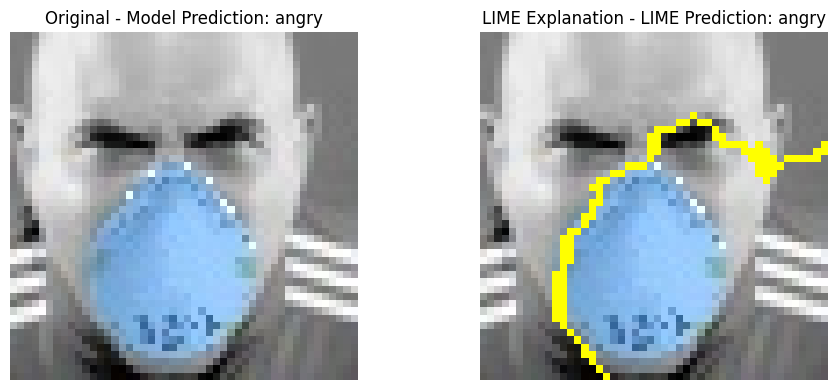

In [35]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from keras.applications.imagenet_utils import decode_predictions

def explain_prediction(image_path, model, classes = ['angry', 'happy', 'neutral', 'sad', 'surprise']):
    # Step 1: Load the image as RGB
    img = load_img(image_path, target_size=(48, 48), color_mode='rgb')  # Load as RGB
    img_array = img_to_array(img).astype(np.uint8)                      # Shape: (48, 48, 3)
    
    # Step 2: Preprocess image
    img_input = img_array / 255.0
    img_input = np.expand_dims(img_input, axis=0)                       # Shape: (1, 48, 48, 3)

    # Step 3: Predict with model
    model_pred = model.predict(img_input)
    predicted_label = classes[np.argmax(model_pred)]

    # Step 4: LIME setup
    explainer = lime_image.LimeImageExplainer()

    def predict_fn(images):
        images = images / 255.0
        return model.predict(images)

    explanation = explainer.explain_instance(
        image=img_array,
        classifier_fn=predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    lime_predicted_label = explanation.top_labels[0]
    lime_image_, mask = explanation.get_image_and_mask(
        lime_predicted_label,
        positive_only=True,
        num_features=5,
        hide_rest=False
    )

    # Step 5: Plot original and explanation
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].imshow(img_array.astype(np.uint8))
    ax[0].set_title(f"Original - Model Prediction: {predicted_label}")
    ax[0].axis('off')

    ax[1].imshow(mark_boundaries(lime_image_, mask))
    ax[1].set_title(f"LIME Explanation - LIME Prediction: {classes[lime_predicted_label]}")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

explain_prediction(r'Masked-fer2013\train\angry\22_N95.jpg', model)

In [36]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(y_true, y_pred_probs, class_names):
    """
    y_true: shape (n_samples,) with class indices (0, 1, ..., n_classes-1)
    y_pred_probs: shape (n_samples, n_classes) softmax outputs
    class_names: list of class labels
    """
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Multiclass ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [46]:
history = model.fit(
    X_masked, y_one_hot_masked,
    validation_data = (X_masked_test, y_test_one_hot),
    epochs=5,  # You can change this
    batch_size=32
)

Epoch 1/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 1255s 2s/step - accuracy: 0.3751 - loss: 1.3712 - val_accuracy: 0.4064 - val_loss: 1.6856
Epoch 2/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 1366s 3s/step - accuracy: 0.5342 - loss: 0.9880 - val_accuracy: 0.4242 - val_loss: 1.8277
Epoch 3/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 2035s 4s/step - accuracy: 0.5583 - loss: 0.9274 - val_accuracy: 0.4264 - val_loss: 1.8440
Epoch 4/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 1942s 4s/step - accuracy: 0.5795 - loss: 0.9047 - val_accuracy: 0.4353 - val_loss: 1.5256
Epoch 5/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 1885s 4s/step - accuracy: 0.6212 - loss: 0.8574 - val_accuracy: 0.4951 - val_loss: 2.4833


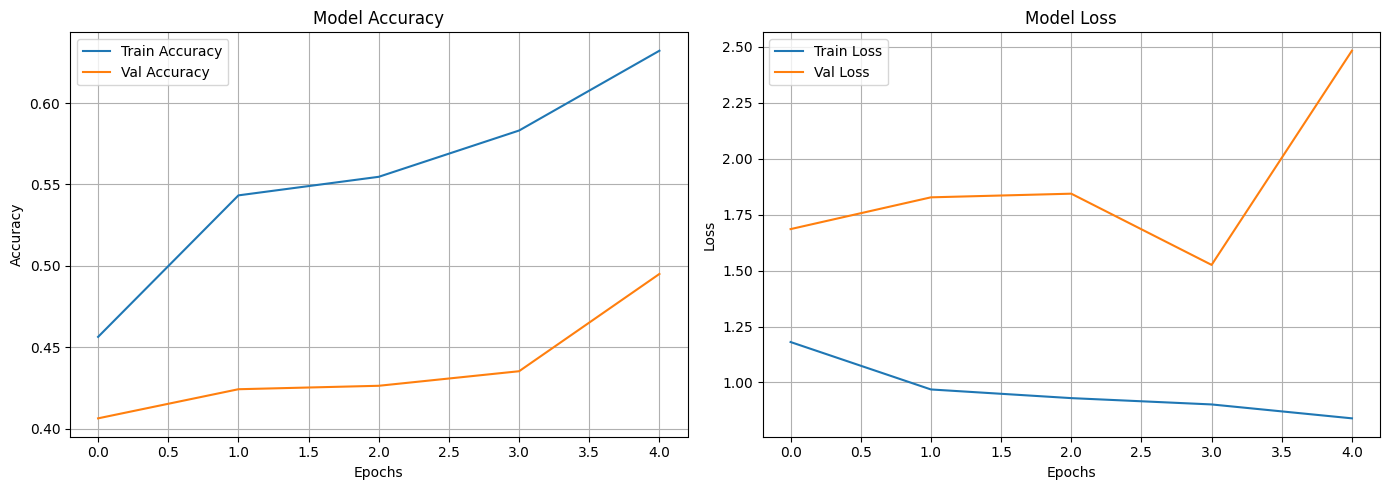

133/133 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step


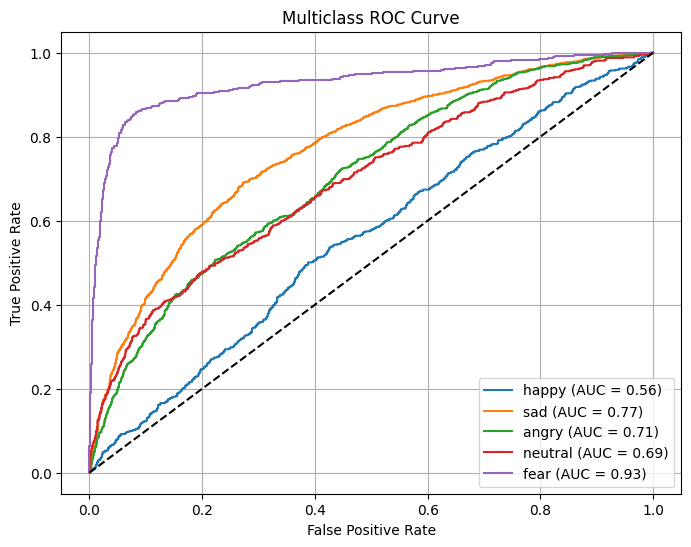

In [47]:
# Plot history
plot_training_history(history)

# Predict probabilities on test data
y_pred_probs = model.predict(X_masked_test)  # shape: (n_samples, n_classes)

# True labels: e.g., y_test = [0, 2, 1, ...]
plot_multiclass_roc(y_masked_test, y_pred_probs, class_names=['happy', 'sad', 'angry', 'neutral', 'fear'])
